In [4]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)\
mp_drawing = mp.solutions.drawing_utils

SyntaxError: invalid syntax (2363640764.py, line 3)

[ WARN:0@2.066] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/Users/tonystark/Desktop/snapchat dataset/sam1.jpg'): can't open/read file: check file path/integrity


TypeError: 'NoneType' object is not subscriptable

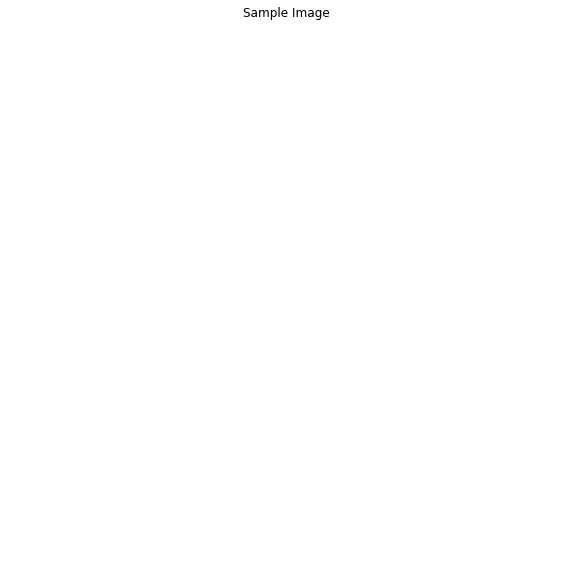

In [3]:
sample_img = cv2.imread('/Users/tonystark/Desktop/snapchat dataset/sam1.jpg')
plt.figure(figsize = [10, 10])
plt.title("Sample Image");
plt.axis('off');
plt.imshow(sample_img[:,:,::-1]);
plt.show()

In [4]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])
if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
        print(f'FACE NUMBER: {face_no+1}')
        print('---------------------------------')
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        face_data = face.location_data
        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')
        for i in range(2):
            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}') 
            

TypeError: 'NoneType' object is not subscriptable

In [5]:
img_copy = sample_img[:,:,::-1].copy()
if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
         mp_drawing.draw_detection(image=img_copy, detection=face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
fig = plt.figure(figsize = [10, 10])
plt.title("Resultant Image");
plt.axis('off');
plt.imshow(img_copy);
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [3]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=5, 
                                         min_detection_confidence=0.5,min_tracking_confidence=0.3)

mp_drawing_styles = mp.solutions.drawing_styles

NameError: name 'mp' is not defined

In [7]:
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:
    
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
        
        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')
        
        print(f'LEFT EYE LANDMARKS:\n')
        
        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:
            
            print(face_landmarks.landmark[LEFT_EYE_INDEX])
        
        print(f'RIGHT EYE LANDMARKS:\n')
        
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:
            
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

TypeError: 'NoneType' object is not subscriptable

In [8]:
img_copy = sample_img[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:
    
    for face_landmarks in face_mesh_results.multi_face_landmarks:
        
       
        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  landmark_drawing_spec=None, 
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        
fig = plt.figure(figsize = [10, 10])

plt.title("Resultant Image");
plt.axis('off');
plt.imshow(img_copy);
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [9]:
def detectFacialLandmarks(image, face_mesh, display = True):
    
    
    results = face_mesh.process(image[:,:,::-1])
    
    output_image = image[:,:,::-1].copy()
    
    if results.multi_face_landmarks:

        for face_landmarks in results.multi_face_landmarks:

            
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=None, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())

            
            mp_drawing.draw_landmarks(image=output_image, landmark_list=face_landmarks,
                                      connections=mp_face_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=None, 
                                      connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

    if display:
        
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image);plt.title("Output");plt.axis('off');
        

    else:
        
        return np.ascontiguousarray(output_image[:,:,::-1], dtype=np.uint8), results              

In [1]:
camera_video = cv2.VideoCapture(0)
camera_video.set(3,1280)
camera_video.set(4,960)

cv2.namedWindow('Face Landmarks Detection', cv2.WINDOW_NORMAL)

time1 = 0

while camera_video.isOpened():
    
    ok, frame = camera_video.read()
    
    
    if not ok:
        continue
    
    
    frame = cv2.flip(frame, 1)
    
    frame, _ = detectFacialLandmarks(frame, face_mesh_videos, display=False)
    
    time2 = time()
    
    
    if (time2 - time1) > 0:
    
        frames_per_second = 1.0 / (time2 - time1)
        
        cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                    cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
    
    
    time1 = time2
    
    cv2.imshow('Face Landmarks Detection', frame)
    
    k = cv2.waitKey(1) & 0xFF    
    
    if(k == 27):
        break

camera_video.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined